In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [65]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [66]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1213 files belonging to 4 classes.


In [67]:
class_names = dataset.class_names
class_names

['Alluvial Soil', 'Black Soil', 'Clay Soil', 'Red Soil']

In [68]:
len(dataset)

38

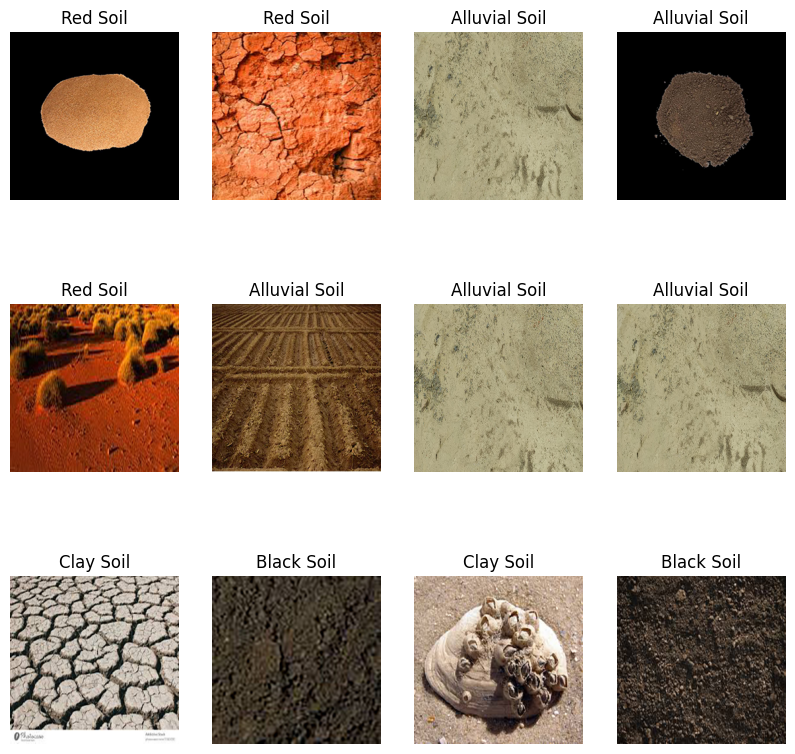

In [69]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [70]:
len(dataset)

38

In [71]:
80% ==> training
20% ==> validation, 10% test

SyntaxError: invalid syntax (3057302678.py, line 1)

In [72]:
train_size = 0.8
len(dataset)*train_size

30.400000000000002

In [73]:
train_ds = dataset.take(30)
len(train_ds)

30

In [74]:
test_ds = dataset.skip(30)
len(test_ds)

8

In [75]:
val_size = 0.1
len(dataset)*val_size

3.8000000000000003

In [76]:
val_ds = dataset.take(6)
len(val_ds)

6

In [77]:
test_ds = test_ds.skip(6)
len(test_ds)

2

In [78]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
   
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
   
    return train_ds, val_ds, test_ds

In [79]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [80]:
len(train_ds)

30

In [81]:
len(val_ds)

3

In [82]:
len(test_ds)

3

In [83]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [84]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [85]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
])

In [87]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

resize_and_rescale = layers.Rescaling(1./255)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (256, 256, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [88]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_12 (Sequential)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (32, 4)                     │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [90]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 764ms/step - accuracy: 0.3842 - loss: 1.2754 - val_accuracy: 0.5938 - val_loss: 0.9516
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 788ms/step - accuracy: 0.6368 - loss: 0.8298 - val_accuracy: 0.6875 - val_loss: 0.7410
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 802ms/step - accuracy: 0.7858 - loss: 0.6198 - val_accuracy: 0.7500 - val_loss: 0.6971
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.7871 - loss: 0.5709 - val_accuracy: 0.8021 - val_loss: 0.3551
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8348 - loss: 0.4189 - val_accuracy: 0.8021 - val_loss: 0.3865
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8045 - loss: 0.4141 - val_accuracy: 0.8750 - val_loss: 0.2608
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 997ms/step - accuracy: 0.8761 - loss: 0.3079 - val_accuracy: 0.7917 - val_loss: 0.4007
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 993ms/step - accuracy: 0.7939 - loss: 0.4685 - val_accuracy: 0.8

In [91]:
scores = model.evaluate(test_ds)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.9948 - loss: 0.0480


In [92]:
scores

[0.05331708863377571, 0.9895833134651184]

In [93]:
history

In [94]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 30}

In [95]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [96]:
 history.history['accuracy']

[0.4848484992980957,
 0.6583071947097778,
 0.7836990356445312,
 0.8014628887176514,
 0.8286311626434326,
 0.8202716708183289,
 0.8474399447441101,
 0.8025078177452087,
 0.8453500270843506,
 0.8735632300376892,
 0.8505747318267822,
 0.8620689511299133,
 0.8589341640472412,
 0.8850574493408203,
 0.890282154083252,
 0.8986415863037109,
 0.8892372250556946,
 0.9090909361839294,
 0.8923720121383667,
 0.8934169411659241,
 0.9007314443588257,
 0.9007314443588257,
 0.9038662314414978,
 0.9289446473121643,
 0.9352142214775085,
 0.9383490085601807,
 0.9289446473121643,
 0.92476487159729,
 0.9362591505050659,
 0.9278996586799622,
 0.9414837956428528,
 0.9467084407806396,
 0.9582027196884155,
 0.9529780745506287,
 0.9425287246704102,
 0.9456635117530823,
 0.9498432874679565,
 0.9571577906608582,
 0.9508882164955139,
 0.9414837956428528,
 0.9602925777435303,
 0.9561128616333008,
 0.9582027196884155,
 0.9634273648262024,
 0.9582027196884155,
 0.9655172228813171,
 0.977011501789093,
 0.98328107595443

In [2]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

NameError: name 'history' is not defined

In [1]:
val_acc

NameError: name 'val_acc' is not defined

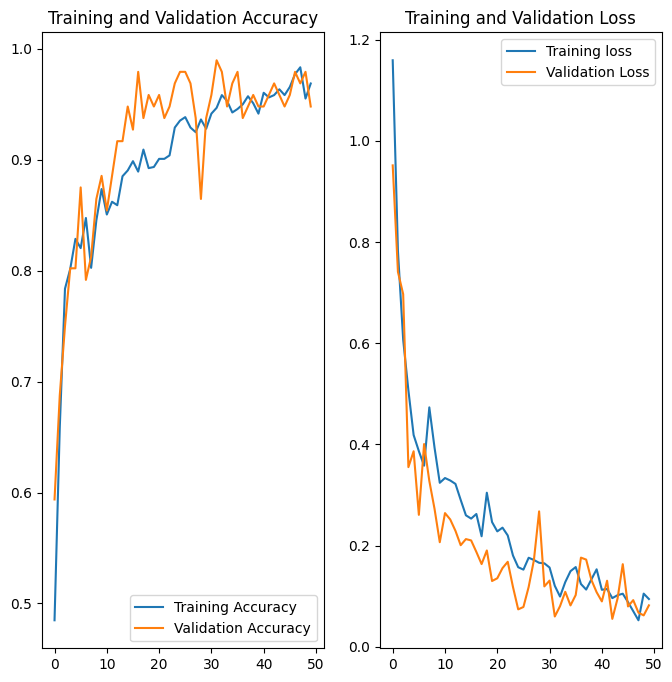

In [98]:

plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [109]:
np.argmax([4.2830678e-03, 9.9571687e-01, 4.3162761e-17])

np.int64(1)

In [1]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

NameError: name 'test_ds' is not defined

In [110]:
def predict(model, img):
    img_array =  image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


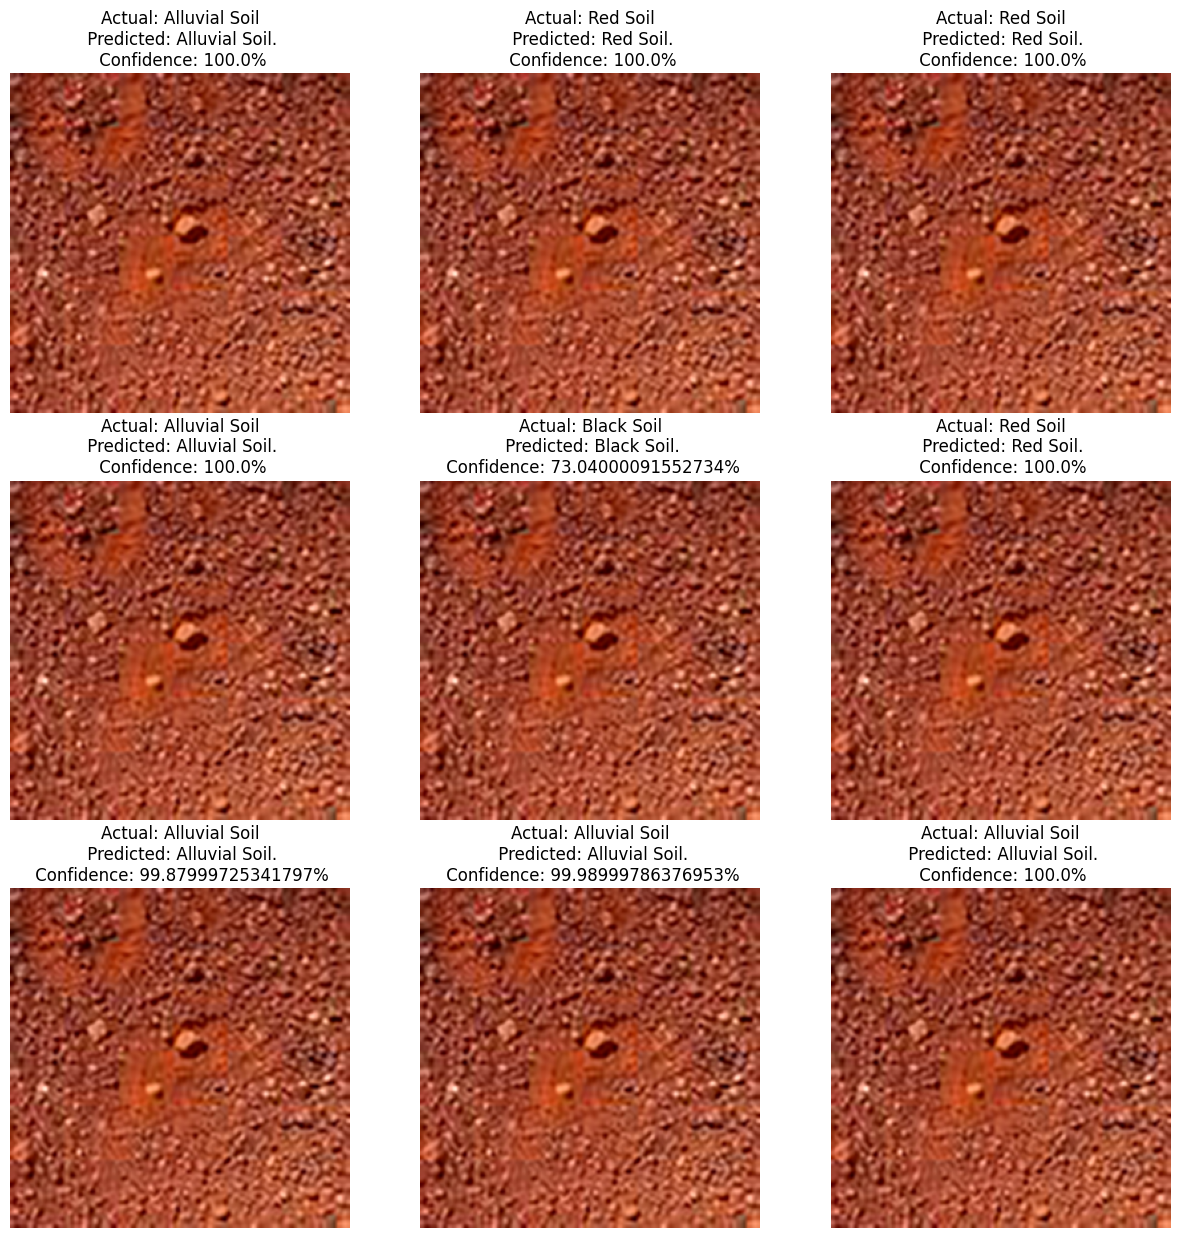

In [111]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[1].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [112]:
model_version=1
model.save(f"../saved_models/{model_version}.keras")